In [38]:
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import numpy as np
import keras

In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32 #take it in batch of 32 
)

Found 2152 files belonging to 3 classes.


In [40]:
class_names = dataset.class_names

In [41]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [42]:
len(dataset) #32*68 almost  equals to total images

68

2025-06-12 19:11:25.684770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


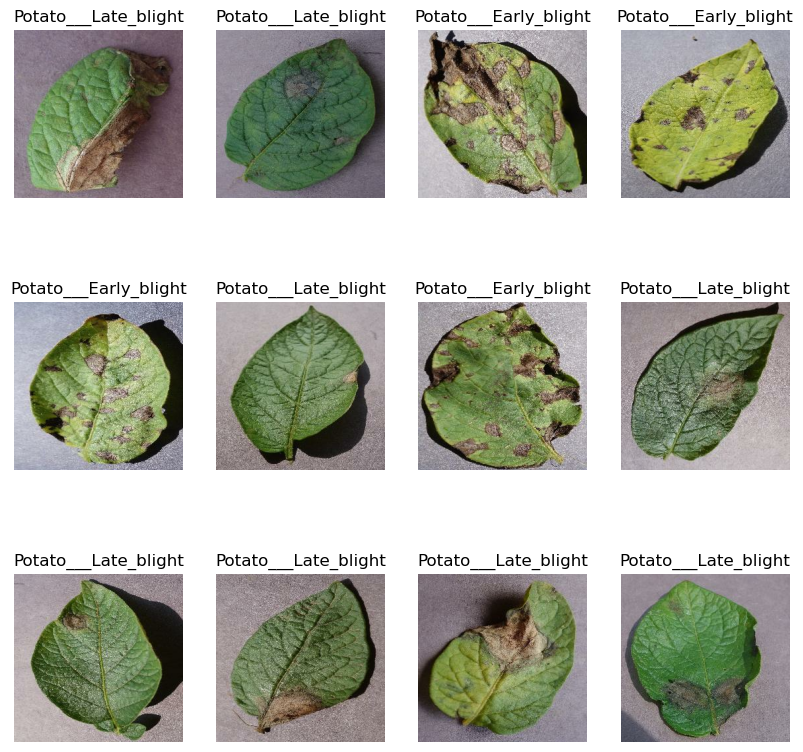

In [43]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):

        ax = plt.subplot(3,4,i+1)
          
        plt.imshow(image_batch[i].numpy().astype("uint8"))#it expects 3D array
          
        plt.title(class_names[label_batch[i]])
          
        plt.axis("off")
     



In [44]:
train_size = 0.8
len(dataset)*0.8

54.400000000000006

In [45]:
train_ds = dataset.take(54)
len(train_ds)

54

In [46]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [47]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [48]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [49]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [50]:

def get_dataset_partitions_tf(ds, train_split =0.8, val_split = 0.1 , test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds , test_ds
    

In [51]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [52]:
len(train_ds)

54

In [53]:

len(val_ds)

6

In [54]:
len(test_ds)

8

In [55]:
train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255.0)
])

In [57]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [58]:
model  = tf.keras.Sequential([
    layers.InputLayer(shape = (256,256,3)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax'),
])

In [59]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = (['accuracy'])
)

In [62]:
history = model.fit(
    train_ds,
    epochs = 10,
    batch_size = 32,
    verbose = 1 , 
    validation_data = val_ds,
)

Epoch 1/10


2025-06-12 19:12:06.661426: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.4887 - loss: 0.9172 - val_accuracy: 0.6615 - val_loss: 0.7352
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.6917 - loss: 0.6542 - val_accuracy: 0.7083 - val_loss: 0.5448
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.7611 - loss: 0.5212 - val_accuracy: 0.8698 - val_loss: 0.3223
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.8310 - loss: 0.3842 - val_accuracy: 0.8646 - val_loss: 0.2508
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.8854 - loss: 0.2992 - val_accuracy: 0.8802 - val_loss: 0.2788
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.8911 - loss: 0.2787 - val_accuracy: 0.8802 - val_loss: 0.3405
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.8955 - loss: 0.2547 - val_accuracy: 0.9427 - val_loss: 0.1943
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.8747 - loss: 0.2918 - val_accuracy: 0.953

In [63]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8818 - loss: 0.2841


In [64]:
scores

[0.27177587151527405, 0.88671875]

In [65]:
history


In [66]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [67]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [68]:
type(history.history['loss'])

list

In [69]:
len((history.history['loss']))

10

In [70]:
history.history['loss'][:5]

[0.8397011756896973,
 0.6223498582839966,
 0.4573163092136383,
 0.3667107820510864,
 0.3111429214477539]

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

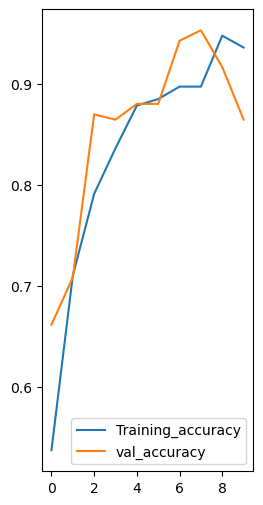

In [74]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(10),acc, label = 'Training_accuracy')#=50=epochs
plt.plot(range(10),val_acc, label = 'val_accuracy')
plt.legend(loc='lower right')


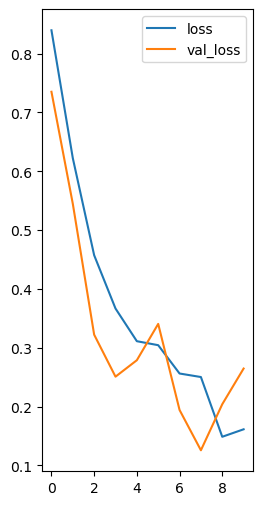

In [75]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(10),loss, label = 'loss')#25=epochs
plt.plot(range(10),val_loss, label = 'val_loss')
plt.legend(loc='upper right')


actual label =  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


2025-06-12 19:19:11.784868: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2025-06-12 19:19:11.950947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


predicted label =  Potato___Late_blight


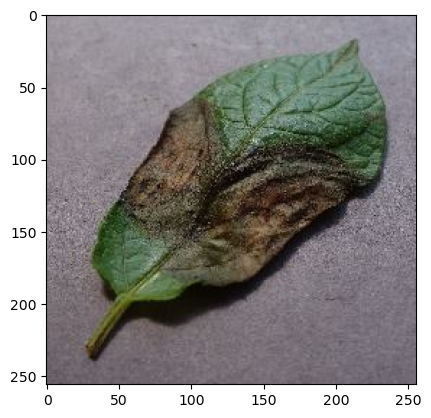

In [76]:
for images_batch , labels_batch in test_ds.take(1):#from batch it will take batch of 32 images

    image = images_batch[0].numpy().astype('uint8')
    plt.imshow(image)
    label = labels_batch[0].numpy()
    print("actual label = " , class_names[label])
    prediction = model.predict(images_batch)
    print("predicted label = " , class_names[np.argmax(prediction[0])]) #if prediction[0] it will give highest probablity that is class

In [77]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    prediction = model.predict(img_array)
    predicted_class = [class_names[np.argmax(prediction[0])]]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


2025-06-12 19:19:17.386882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


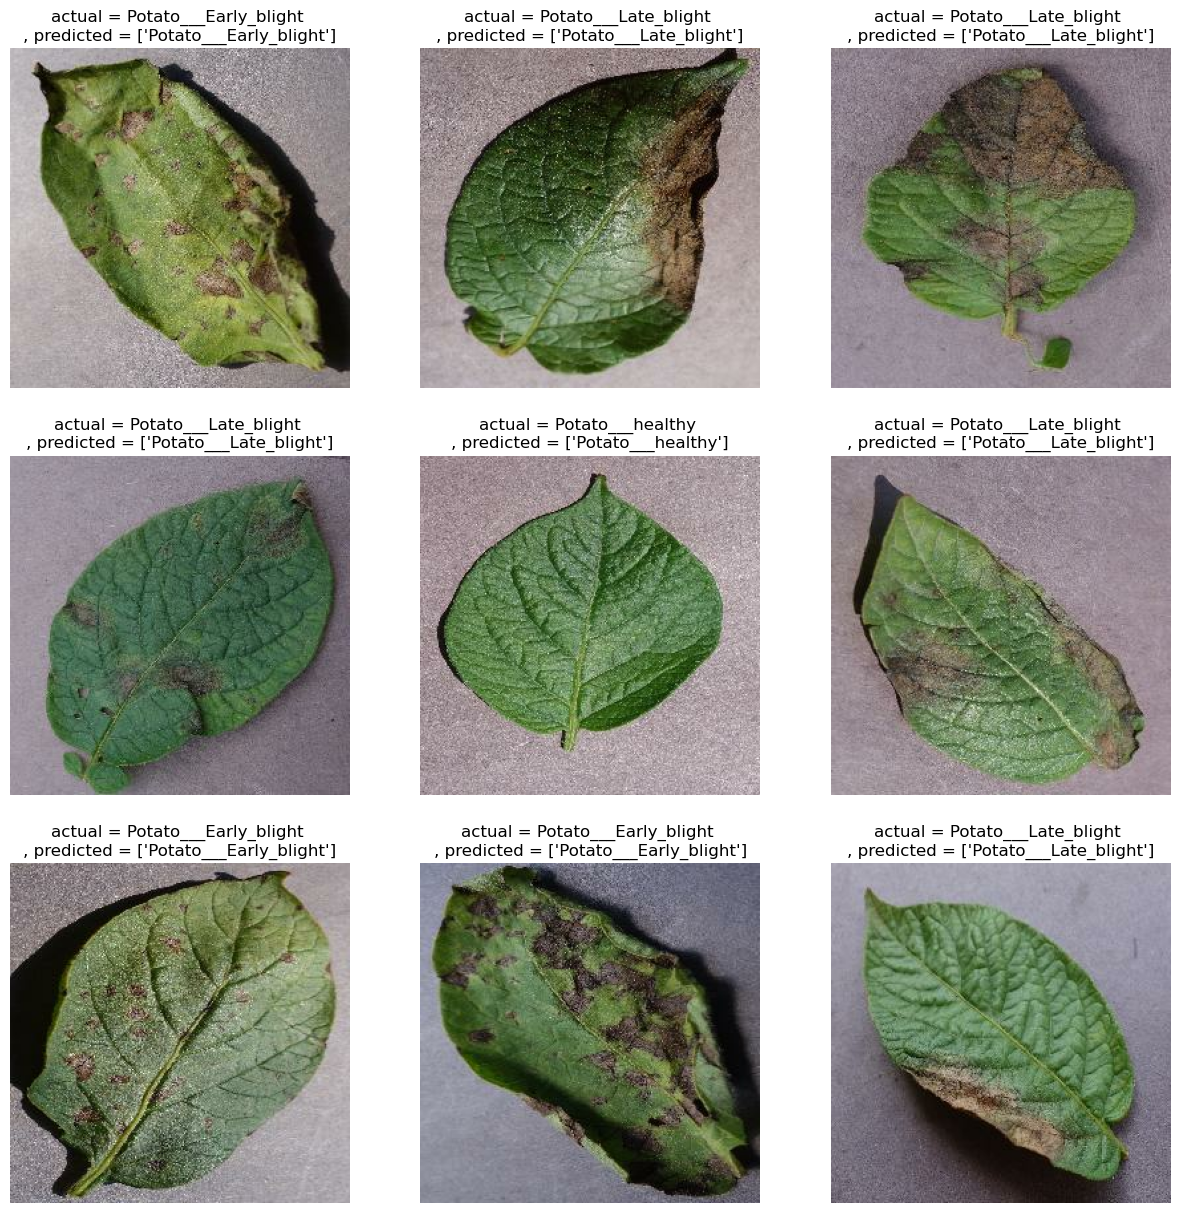

In [78]:
plt.figure(figsize = (15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"actual = {actual_class} \n, predicted = {predicted_class}")
        plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


2025-06-12 19:19:50.046023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


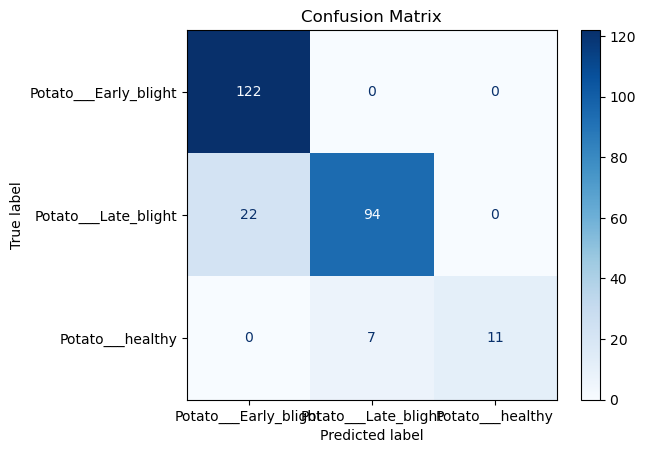

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions and true labels for the test dataset
true_labels = []
predicted_labels = []

for images_batch, labels_batch in test_ds:
    predictions = model.predict(images_batch)
    true_labels.extend(labels_batch.numpy())
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(class_names)))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

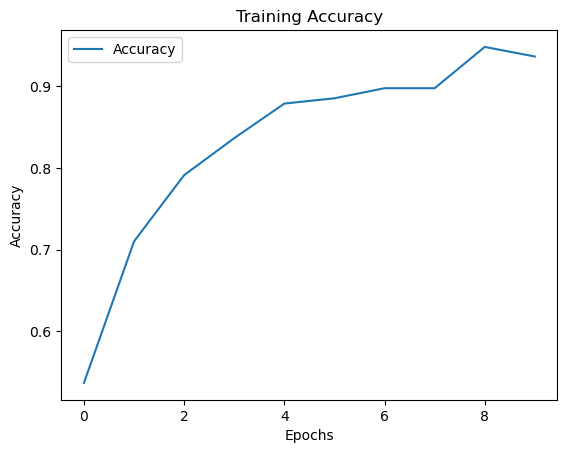

Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.88
Confusion Matrix:
[[122   0   0]
 [ 22  94   0]
 [  0   7  11]]


In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example of plotting accuracy over epochs
plt.plot(range(len(acc)), acc, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()
# Extract accuracy from scores
accuracy = scores[1]

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

In [85]:
model.export(f"../DL/{model_version}")

INFO:tensorflow:Assets written to: ../DL/1/assets


INFO:tensorflow:Assets written to: ../DL/1/assets


Saved artifact at '../DL/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  14592201872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14592202832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720706576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720708112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720704656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720705616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720706192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720705808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720707152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14720706000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13399113808: TensorSpec(shape=(), dtype=tf.resource, name=No